In [1]:
#  line for 3 channel
# Load pickled data
import pickle
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data
#X_train, y_train = readTrafficSigns('GTSRB/Training')


training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
XX_valid, yy_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print(X_train.shape)


(34799, 32, 32, 3)


In [2]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [3]:
# splitting data in order to get a bigger size validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=.5, random_state=len(X_train))

13
[70 47 52]


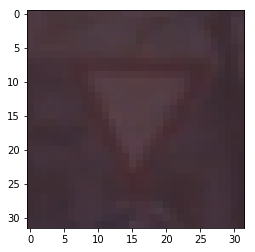

In [4]:
# test to show image before normalizing the data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline
test = 4000
plt.imshow(X_train[test])
print(y_train[test])
print(X_train[test, 20,12])

In [5]:
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    #a = 0.1
    #b = 0.9
    a = 0.02
    b = 0.98
    grayscale_min = 0.0
    grayscale_max = 255.0
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

[ 0.28352941  0.19694118  0.21576471]


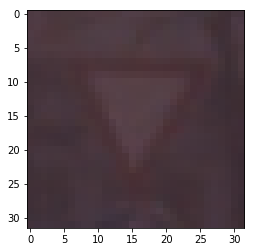

In [6]:
#normalizing the input data (images pixels)
X_train = normalize_grayscale(X_train)
X_valid = normalize_grayscale(X_valid)
X_test = normalize_grayscale(X_test)
plt.imshow(X_train[test])
print(X_train[test, 20,12])

In [7]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]
print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 17399
Number of validation examples = 17400
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


3912
1


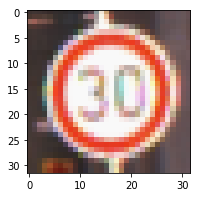

In [8]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

#New code by me
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(3,3))
plt.imshow(image)
print(index)
print(y_train[index])

In [9]:
#New line added by me for shuffling the data

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [11]:
# New line by me for training architecture
import tensorflow as tf
from tensorflow.contrib.layers import flatten
keep_prob = tf.placeholder(tf.float32) # probability to keep units
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma)) # for 3 channel images
    #conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma)) #For gray images
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    


    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [12]:
#New line by me for features and labels:
x = tf.placeholder(tf.float32, (None, 32, 32, 3)) # for 3 channel images
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y,43)
keep_prob = tf.placeholder(tf.float32) # defining the dropout probability after fully connected layer in the architecture
print('Variables initialized successfully')

Variables initialized successfully


In [13]:
rate = 0.001

In [14]:
# New line added by me for training pipeline 
EPOCHS = 50
BATCH_SIZE = 128

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [15]:
# New line by me for evaluation pipeline and evaluation of the model
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [16]:
#New line by me for training the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        #rate = fix*(1-i/(EPOCHS+1))
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    softmax = tf.nn.softmax(logits)
    top_k = tf.nn.top_k(softmax, k =5)
    
    saver.save(sess, './lenet')
    print("Model saved")
    
    #test_accuracy = evaluate(X_test, y_test)
    #print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    #web_accuracy = evaluate(web_images, web_labels)
    #web_accuracy = sess.run(accuracy_operation, feed_dict={x: web_images, y: web_labels, keep_prob: 1})
    #print("Web Accuracy = {:.3f}".format(web_accuracy))

Training...

EPOCH 1 ...
Validation Accuracy = 0.363

EPOCH 2 ...
Validation Accuracy = 0.575

EPOCH 3 ...
Validation Accuracy = 0.711

EPOCH 4 ...
Validation Accuracy = 0.808

EPOCH 5 ...
Validation Accuracy = 0.850

EPOCH 6 ...
Validation Accuracy = 0.888

EPOCH 7 ...
Validation Accuracy = 0.891

EPOCH 8 ...
Validation Accuracy = 0.925

EPOCH 9 ...
Validation Accuracy = 0.933

EPOCH 10 ...
Validation Accuracy = 0.935

EPOCH 11 ...
Validation Accuracy = 0.946

EPOCH 12 ...
Validation Accuracy = 0.953

EPOCH 13 ...
Validation Accuracy = 0.953

EPOCH 14 ...
Validation Accuracy = 0.956

EPOCH 15 ...
Validation Accuracy = 0.957

EPOCH 16 ...
Validation Accuracy = 0.963

EPOCH 17 ...
Validation Accuracy = 0.965

EPOCH 18 ...
Validation Accuracy = 0.966

EPOCH 19 ...
Validation Accuracy = 0.969

EPOCH 20 ...
Validation Accuracy = 0.972

EPOCH 21 ...
Validation Accuracy = 0.972

EPOCH 22 ...
Validation Accuracy = 0.973

EPOCH 23 ...
Validation Accuracy = 0.972

EPOCH 24 ...
Validation Accura

In [17]:
#Evaluating test data:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import numpy as np
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.941


my images shape: (5, 32, 32, 3)


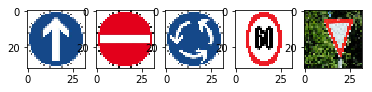

In [30]:
# Load the images and plot them here.
import matplotlib.image as mpimg
import cv2
img_folder = 'GTS/'
my_images = np.zeros((5,32,32,3))
my_labels = [35, 17, 40, 3, 13]
for i in range(5):
    image = mpimg.imread(img_folder + "img" + "%d.jpg" %(i+1) )
    image = cv2.resize(image, (32,32))
    my_images[i] = image
    plt.subplot(1, 5, i+1)
    plt.imshow(image)
print("my images shape:" , my_images.shape)   

In [ ]:
#with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    #web_softmax_logits = sess.run(softmax, feed_dict={x: my_images, keep_prob: 1.0})
    #web_top_k = sess.run(top_k, feed_dict={x: my_images, keep_prob: 1.0})
    #print(web_top_k)
    #print(web_softmax_logits)

In [ ]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_images, keep_prob: 1.0})
    print(my_softmax_logits)
    print(my_top_k)


In [ ]:
for i in range(5):
    print("Predicted Output= ", my_top_k[1][i][0])
    print("Actual labels = ", my_labels[i])

In [ ]:
# Evaluate 5 images obtained from web
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    web_accuracy = evaluate(my_images, my_labels)
    print("Web Accuracy = {:.3f}".format(web_accuracy))